In [95]:
import pandas as pd

In [96]:
dataset=pd.read_csv("Weather Dataset.csv")

In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [98]:
dataset

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [99]:
dataset=dataset.drop("Date/Time",axis=1)

In [100]:
dataset=dataset.drop("Dew Point Temp_C",axis=1)

In [101]:
dataset.columns

Index(['Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa',
       'Weather'],
      dtype='object')

In [102]:
ind =dataset[['Temp_C', 'Rel Hum_%','Wind Speed_km/h', 'Visibility_km', 'Press_kPa',]]

In [103]:
ind

,Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
0,-1.8,86,4,8.0,101.24
1,-1.8,87,4,8.0,101.24
2,-1.8,89,7,4.0,101.26
3,-1.5,88,6,4.0,101.27
4,-1.5,88,7,4.8,101.23
...,...,...,...,...,...
8779,0.1,81,30,9.7,100.13
8780,0.2,83,24,9.7,100.03
8781,-0.5,93,28,4.8,99.95
8782,-0.2,89,28,9.7,99.91


In [104]:
dep=dataset[["Weather"]]

In [105]:
dep

,Weather
0,Fog
1,Fog
2,"Freezing Drizzle,Fog"
3,"Freezing Drizzle,Fog"
4,Fog
...,...
8779,Snow
8780,Snow
8781,Snow
8782,Snow


In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ind, dep, test_size=0.20, random_state=42)

In [107]:
from sklearn import tree

In [108]:
clf = tree.DecisionTreeClassifier()

In [109]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [110]:
y_pred=clf.predict(X_test)

In [111]:
from sklearn.metrics import classification_report

In [112]:
cls=classification_report(y_test, y_pred)

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [113]:
print(cls)

                                  precision    recall  f1-score   support

                           Clear       0.38      0.38      0.38       251
                          Cloudy       0.44      0.45      0.45       356
                         Drizzle       0.12      0.11      0.12         9
                     Drizzle,Fog       0.25      0.22      0.24        18
                    Drizzle,Snow       0.00      0.00      0.00         1
                Drizzle,Snow,Fog       1.00      1.00      1.00         1
                             Fog       0.60      0.60      0.60        35
                Freezing Drizzle       0.00      0.00      0.00         0
            Freezing Drizzle,Fog       0.00      0.00      0.00         0
           Freezing Drizzle,Haze       0.00      0.00      0.00         0
           Freezing Drizzle,Snow       0.50      0.25      0.33         4
                    Freezing Fog       0.00      0.00      0.00         1
                   Freezing Rain     

In [114]:
from sklearn.metrics import classification_report, confusion_matrix


In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

In [116]:
cm = confusion_matrix(y_test, y_pred)

In [117]:
data = {"Weather": [
    "Clear", "Cloudy", "Drizzle", "Snow", "Rain Showers",
    "Rain,Fog", "Snow,Fog", "Thunderstorms,Rain Showers", "Haze"
]}

In [118]:
df = pd.DataFrame(data)

In [119]:
mapping={
    #clear
    "Clear": "Clear", "Mainly Clear": "Clear", "Mostly Cloudy": "Clear",
    #clody
    "Cloudy": "Cloudy",
    #rain
    "Drizzle": "Rain", "Drizzle,Fog": "Rain", "Drizzle,Snow": "Rain", "Drizzle,Snow,Fog": "Rain",
    "Freezing Drizzle": "Rain", "Freezing Drizzle,Fog": "Rain", "Freezing Drizzle,Haze": "Rain",
    "Freezing Drizzle,Snow": "Rain", "Freezing Rain": "Rain", "Freezing Rain,Fog": "Rain",
    "Freezing Rain,Haze": "Rain", "Freezing Rain,Snow Grains": "Rain",
    "Rain": "Rain", "Rain Showers": "Rain", "Rain,Fog": "Rain", "Rain,Haze": "Rain",
    "Rain,Ice Pellets": "Rain", "Rain,Snow": "Rain", "Rain,Snow Grains": "Rain",
    "Rain,Snow,Ice Pellets": "Rain", "Thunderstorms,Heavy Rain Showers": "Rain",
    "Thunderstorms,Rain Showers": "Rain", "Thunderstorms,Rain Showers,Fog": "Rain",
    #snow
    "Moderate Snow": "Snow", "Moderate Snow,Blowing Snow": "Snow", "Snow": "Snow",
    "Snow Pellets": "Snow", "Snow Showers": "Snow", "Snow Showers,Fog": "Snow",
    "Snow,Blowing Snow": "Snow", "Snow,Fog": "Snow", "Snow,Haze": "Snow",
    "Snow,Ice Pellets": "Snow",
      # Fog/Haze/Other
     "Fog": "Fog/Haze", "Freezing Fog": "Fog/Haze", "Haze": "Fog/Haze"
}



In [120]:
df["Category"] = df["Weather"].map(mapping)

In [121]:
print(df)

                      Weather  Category
0                       Clear     Clear
1                      Cloudy    Cloudy
2                     Drizzle      Rain
3                        Snow      Snow
4                Rain Showers      Rain
5                    Rain,Fog      Rain
6                    Snow,Fog      Snow
7  Thunderstorms,Rain Showers      Rain
8                        Haze  Fog/Haze


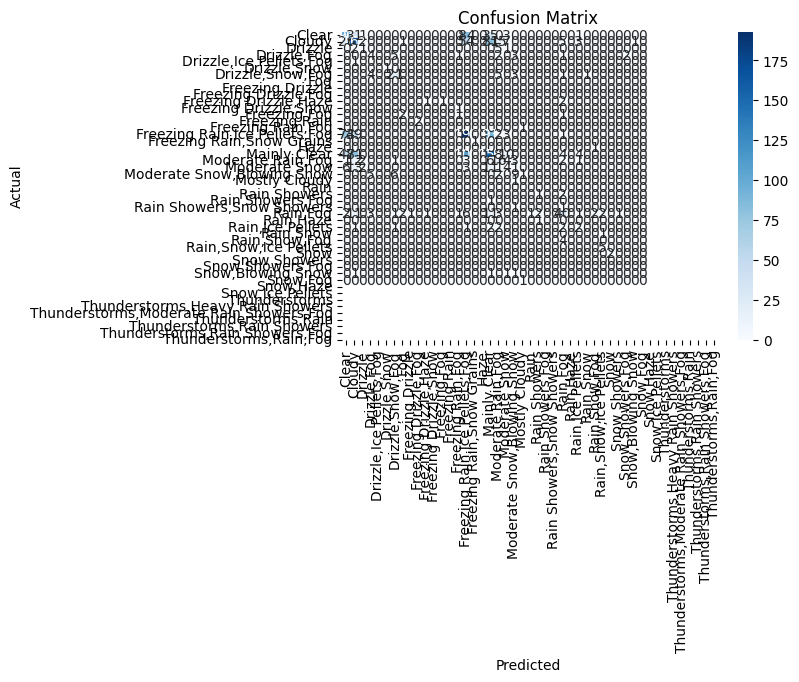

In [123]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()